<a href="https://colab.research.google.com/github/nikaprokudina/budget_constraints_lab/blob/main/Budget_Constraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений. 
* В первой модели существуют только два товара определенной цены. 
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Импорт библиотек

In [ ]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [ ]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100    
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

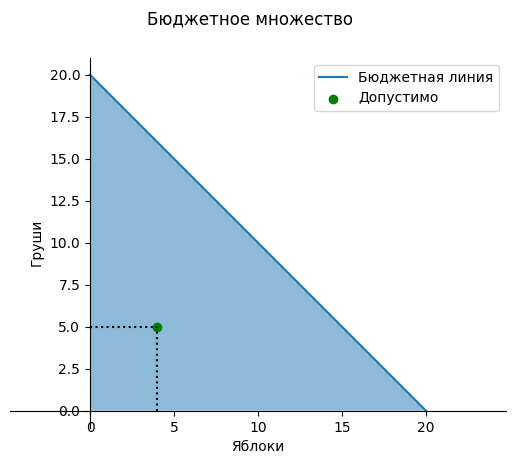

In [ ]:

def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100   
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [ ]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [ ]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [ ]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price']) 
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [ ]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [ ]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [ ]:
df_super.to_excel("model1_result.xlsx") # Сохраняем 

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$ 
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2} 
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [ ]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([2,1]) # матрица 2x1 из единиц 

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение 
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

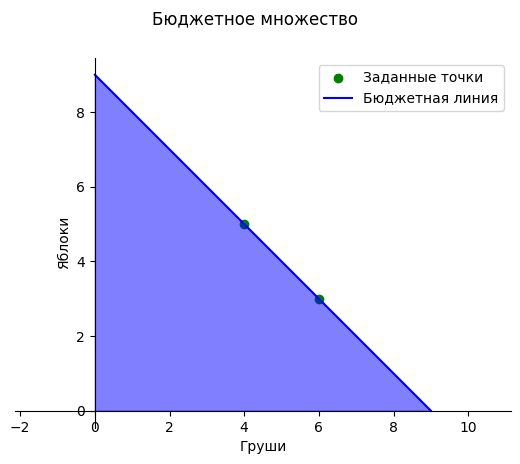

In [ ]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price] 
        y_points = [budget/g2.price, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [ ]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [ ]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений: 

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + ... + p_3 a_{1,n}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + ... + p_3 a_{2,n}= 1\\
...\\
p_1 a_{n,1} + p_2 a_{n,2} + ... + p_3 a_{n,n}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & ... & a_{1,n}\\
    a_{2,1} & a_{2,2} & ... & a_{2,n}\\
    ... & ... & ... & ...\\
    a_{n,1} & a_{n,2} & ... & a_{n,n}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        ...\\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        ...\\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        ...\\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & ... & a_{1,n}\\
    a_{2,1} & a_{2,2} & ... & a_{2,n}\\
    ... & ... & ... & ...\\
    a_{n,1} & a_{n,2} & ... & a_{n,n}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        ...\\
        1
\end{pmatrix}
$$

In [ ]:
def get_goods_parameters(list_of_points: np.array):
    list_of_points = np.array(list_of_points) # convert list to numpy array
    ones = np.ones([list_of_points.shape[0],1])  # матрица nx1 из единиц 

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

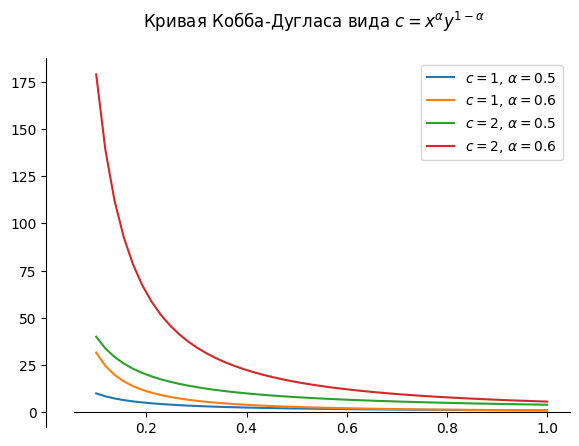

In [ ]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    
    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

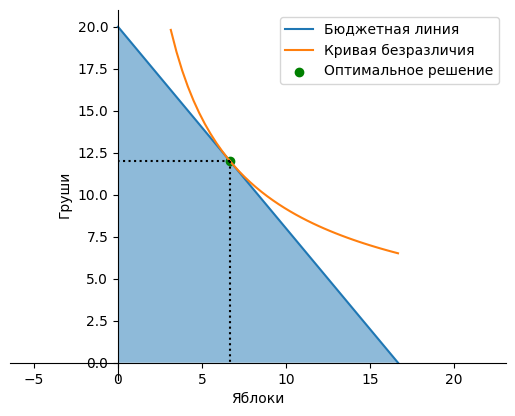

In [ ]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [ ]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида 
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

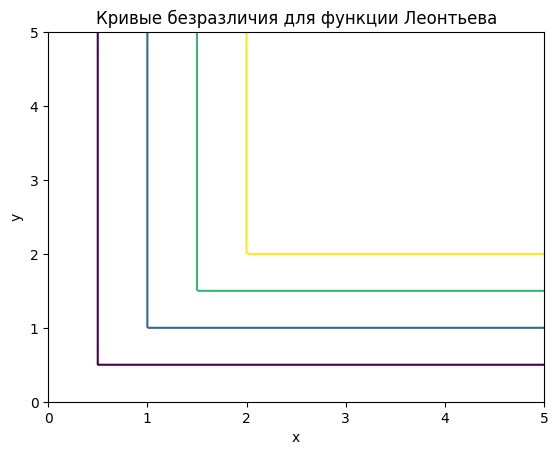

In [ ]:
def leontev(x, y, a, b):
    c = np.minimum(x/a, y/b)
    return c

def plot_Leontev(a_values, b_values):
    x = np.linspace(0, 5, 100)
    X, Y = np.meshgrid(x, x)

    for a in a_values:
        for b in b_values:
            c = leontev(X, Y, a, b) 
            plt.contour(X, Y, c, levels=[1, 2, 3, 4])
a_values = [0.5]
b_values = [0.5]

plot_Leontev(a_values, b_values)

plt.title('Кривые безразличия для функции Леонтьева')
plt.xlabel('x')
plt.ylabel('y')


plt.show()

### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

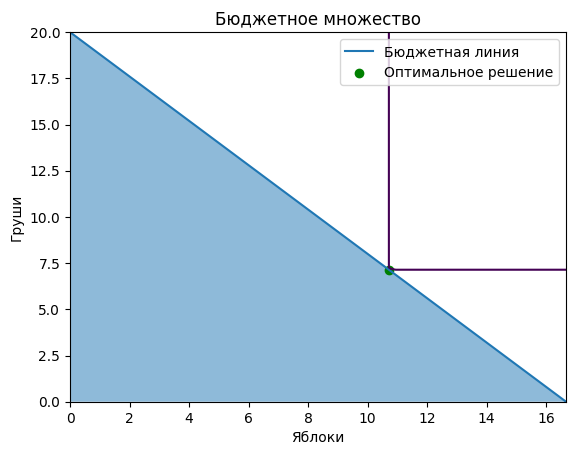

In [ ]:
def plot_budget_Leontev(g1, g2, budget, a, b):
    x_points = [0, budget / g1.price]
    y_points = [budget / g2.price, 0]

    plt.plot(x_points, y_points, label="Бюджетная линия")
    plt.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    x_opt = budget * a / (a * g1.price + b * g2.price)
    y_opt = b * x_opt / a
    plt.scatter(x_opt, y_opt, label="Оптимальное решение", color='green')


    x = np.linspace(0, budget / g1.price, 100)
    y = np.linspace(0, budget / g2.price, 100)

    X, Y = np.meshgrid(x, y)
    c = leontev(X, Y, a, b) 
    plt.contour(X, Y, c, levels=[x_opt/a])

    plt.title('Бюджетное множество')
    plt.xlabel(g1.name)
    plt.ylabel(g2.name)
    plt.legend()

    plt.show()


g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
a = 3
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)


### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [ ]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [ ]:
class Good():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    

    if (x1 - g1.free < 0):
        x1 = 0
    else:
        x1 = x1 - g1.free
    if (x2 - g2.free < 0):
        x2 = 0
    else:
        x2 = x2 - g2.free

    result = x1*g1.price + x2*g2.price 
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1
    

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

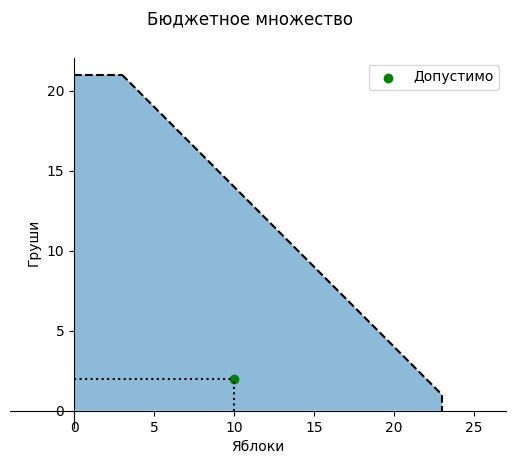

In [ ]:
def plot_budget(g1: Good, g2: Good, budget, x1, x2):
    fig, ax = plt.subplots() 
    fig.suptitle("Бюджетное множество")
    
    # Границы бюджетного множества
    bounds = [(0, budget/g2.price+g2.free), (g1.free, budget/g2.price+g2.free), 
              (budget/g1.price+g1.free, g2.free), (budget/g1.price+g1.free, 0)]

    # Рисуем линии между границами бюджетного множества
    for i in range(len(bounds)-1):
        ax.plot([bounds[i][0], bounds[i+1][0]], [bounds[i][1], bounds[i+1][1]], 'k--')

        bounds.append([0,0])

    
    
    # Закрашиваем бюджетное множество
    #ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    polygon = plt.Polygon(bounds, alpha=0.5)
    ax.add_patch(polygon)
    
    point_status = budget_test(g1, g2, budget, x1, x2) 
    
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) 
    ax.plot([x1, x1], [0, x2], 'k:') 
    ax.plot([0, x1], [x2, x2], 'k:') 

    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal')
    ax.legend()
    plt.show() 
    

g1 = Good("Яблоки", 5, 3)
g2 = Good("Груши", 5, 1)
budget = 100
plot_budget(g1, g2, budget, 10, 2)


## Интерактивное представление

In [ ]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [ ]:
df = pd.read_excel("model2_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price'], row['G1_free']) 
    g2 = Good(row['G2_name'], row['G2_price'], row['G1_free'])
    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super = df_super.sort_values(by = 'G1_free') # Сортируем датафрейм по столбцу 
df_super.to_excel("model2_result.xlsx") # Сохраняем
df_super


,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,G1_free,G2_free,Result
0,Бункер,20,Пицца,5,500,5,5,0,1,1
5,Письма призрака,15,Пицца,5,60,1,3,0,1,1
6,Одним словом,5,Суп,4,200,4,2,0,5,1
9,Катан,20,Пицца,5,90,2,1,0,1,1
1,Бункер,20,Суши,10,502,2,2,1,2,1
3,Письма призрака,15,Пицца,5,100,2,2,2,4,1
2,Экивоки,10,Том Ям,8,400,1,3,3,3,1
4,Письма призрака,15,Стейк,7,70,2,1,3,2,1


## Кривые безразличия. <font color="red">Задание 7</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

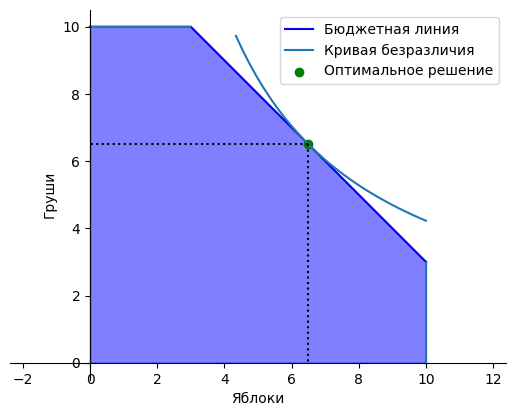

In [ ]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    x_solution = alpha*budget/g1.price + g1.free/2
    y_solution = (1-alpha)*budget/g2.price + g2.free/2
    x_max = budget / g1.price
    y_max = budget / g2.price

    if x_solution > x_max:
        x_solution = x_max
        y_solution = g2.free

    elif y_solution > y_max:
        x_solution = g1.free
        y_solution = y_max

    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)


def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5): 
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, g1.free, budget / g1.price] 
    y_points = [budget / g2.price, budget / g2.price, g2.free]
    fig, ax = plt.subplots()

    ax.plot(x_points, y_points, label="Бюджетная линия", color="blue")
    ax.fill_between(x_points, y_points, np.zeros_like(y_points), alpha=0.5, color = "blue")
    ax.hlines(budget / g2.price, 0, g1.free)
    ax.vlines(budget / g1.price, 0, g2.free)

    x_values = np.linspace(0.1, budget / g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

c_values = [1, 2]
alpha_values = [0.5]
g1 = Good("Яблоки", 10, 3)
g2 = Good("Груши", 10, 3)
budget = 100 
alpha = 0.5
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [ ]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 8</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [ ]:
# Создадим класс для товаров модели
class Good:
    def __init__(self, name, threshold, price1, price2):
        self.name = name
        self.threshold = threshold
        self.price1 = price1
        self.price2 = price2

    def price(self, quantity): #стоимость x товаров
        if quantity <= self.threshold:
            return quantity * self.price1
        else:
            return self.threshold * self.price1 + (quantity - self.threshold) * self.price2

    def quantity(self, budget): #количество товара за бюджет
      if budget/self.price1 <= self.threshold:
        return budget//self.price1
      return self.threshold//self.price1 + (budget-self.threshold)//self.price2



## Бюджетное ограничение. <font color="red">Задание 9</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    total_price1 = g1.price(x1)
    total_price2 = g2.price(x2)
    result = total_price1 + total_price2
    if (is_equal(result, budget)): 
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое и интерактивное представление. <font color="red">Задание 10.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

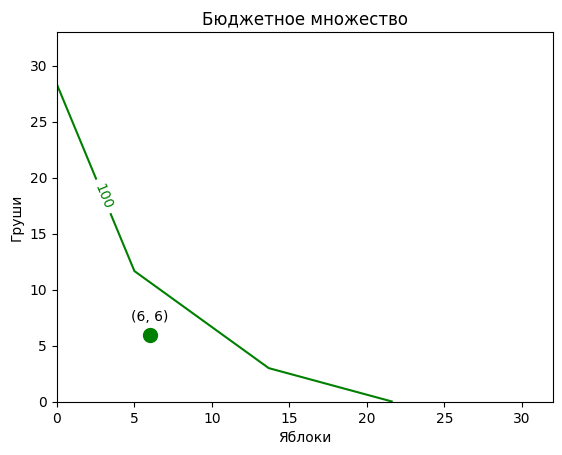

In [ ]:
import matplotlib.pyplot as plt

def plot_budget(g1: Good, g2: Good, budget, x, y):
    # Рассчитываем количество каждого товара в зависимости от бюджета
    x_max = g1.quantity(budget)
    y_max = g2.quantity(budget)
    
    # Создаем сетку точек для графика
    x_range = range(x_max + 2)
    y_range = range(y_max + 2)
    
    # Вычисляем стоимость каждой точки на сетке
    z = [[g1.price(i) + g2.price(j) for i in x_range] for j in y_range]
    
    # Создаем график и добавляем на него контуры бюджетного множества
    fig, ax = plt.subplots()
    cs = ax.contour(x_range, y_range, z, levels=[budget], colors='green')
    ax.clabel(cs, inline=True, fontsize=10)
    
    # Маркируем проверяемую точку
    point_status = budget_test(g1, g2, budget, x, y)

    if point_status == 1:
      ax.scatter(x, y, s=100, color='green')
    elif point_status == 0:
      ax.scatter(x, y, s=100, color='yellow')
    else:
      ax.scatter(x, y, s=100, color='red')
    ax.annotate(f"({x}, {y})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    
    # Добавляем подписи осей и заголовок
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.set_title("Бюджетное множество")
    
    plt.show()


g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 100
plot_budget(g1, g2, budget, 6, 6)

In [ ]:
def interactive_plot(p11, p12, t1, p21, p22, t2, budget, x, y):
    g1 = Good("Яблоки", t1, p11, p12)
    g2 = Good("Груши", t2, p21, p22)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p11=(1, 10), p12=(1, 10), t1=(0, 10), p21 = (1, 10), p22 = (1, 10), t2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p11', max=10, min=1), IntSlider(value=5, description='p1…

<function __main__.interactive_plot(p11, p12, t1, p21, p22, t2, budget, x, y)>